**Tài liệu tham khảo cho Data Modeling**: https://www.kimballgroup.com/data-warehouse-business-intelligence-resources/kimball-techniques/dimensional-modeling-techniques/

muốn làm 1 cái báo cáo dạng mạng nhện

### **1. Các báo cáo tập trung làm trước**

**Báo cáo:** **Thống kê TOP 10 loại bệnh phổ biến theo độ tuổi và giới tính**

- Business process liên quan: Khám bệnh
- Grain: 1 lần chẩn đoán.
- Dim (xác định qua các câu hỏi):
  - What - chẩn đoán cái gì? Loại bệnh -> DimDisease
  - Who - chẩn đoán cho ai? Bệnh nhân -> DimPatient
  - When - chẩn đoán khi nào? Thời gian -> DimTime
  - Where - chẩn đoán ở đâu? Tên Khoa hoặc tên Viện -> DimDepartment (Dữ liệu nguồn không có)
  - Why/How (Báo cáo này không cần)


- FactDiagnoses:
  - Count: 1 (Đây là trường hợp đặc biệt, nên thiết kế fact như vậy để sau tính tổng)
  => Fact gồm các cột: FactID (PK), DiseaseSK (FK), PatientSK (FK), Count (Thuộc tính Fact hay thuộc tính đo lường - theo quan điểm của bác Kimball ^^)

=> Độ tuổi nào mắc loại bệnh nào nhiều nhất


**Báo cáo:** **Top 100 bệnh phổ biến nhất**
- Business process liên quan: Khám bệnh
- Grain: 1 lần chẩn đoán.
- Dim (xác định qua các câu hỏi):
  - What - chẩn đoán cái gì? Loại bệnh -> DimDisease
  - Who - chẩn đoán cho ai? Bệnh nhân -> DimPatient
  - When - chẩn đoán khi nào? Thời gian -> DimTime
  - Where - chẩn đoán ở đâu? Tên Khoa hoặc tên Viện -> DimDepartment (Dữ liệu nguồn không có)
  - Why/How (Báo cáo này không cần)


- FactDiagnoses:
  - Count: 1 (Đây là trường hợp đặc biệt, nên thiết kế fact như vậy để sau tính tổng)
  => Fact gồm các cột: FactID (PK), DiseaseSK (FK), PatientSK (FK), Count (Thuộc tính Fact hay thuộc tính đo lường - theo quan điểm của bác Kimball ^^)



  +>  **Giống hệt Báo cáo trên, chỉ các mục tiêu thống kê**

  => Mục đích: Để đào tạo nhân lực, chuẩn bị thuốc thang, máy móc để đáp ứng nhu cầu điều trị bệnh của bệnh nhân tránh quá tải.

**Báo cáo:** **Tỷ lệ nhập ICU theo nguyên nhân (Ví dụ: sepsis, trauma, cardiac arrest)**

**Báo cáo**: **Phân tích Tỷ lệ tử vong theo Chẩn đoán và Khoa ICU** ⭐⭐⭐⭐⭐

Tại sao phù hợp: MIMIC-IV có dữ liệu tử vong chính xác, coverage toàn bộ ICU
Tables: patients + admissions + icustays + diagnoses_icd + d_icd_diagnoses
Business value: Identify high-mortality conditions by unit → resource allocation
Technical complexity: Trung bình

- Business process liên quan: Quy trình quản lý bệnh nhân ICU
- Grain: Kết quả điều trị của 1 bênh nhân trong 1 lần nhập ICU
- Dim (xác định qua các câu hỏi):
  - What - điều trị cái gì? Loại bệnh được bác sỹ chẩn đoán -> DimDiagnoses
  - Who - điều trị cho ai? Bệnh nhân -> DimPatient
  - When - điều trị khi nào? Thời gian, lần nhập ICU -> DimTime, DimICUStays
  - Where - điều trị ở đâu? Tên Khoa ICU (MICU, SICU,...) -> DimDepartment (Dữ liệu nguồn không có)
  - Why - Tại sao phải điều trị? Trạng thái nguy kịch (suy hô hấp,...) -> DimCause
  - How - Điều trị như thế nào? Phương pháp điều trị (thở máy, truyền thuốc, ...) -> DimMethod


- FactDiagnoses:
  - DeathFlag: 1 - nếu còn sống, nếu đã tử vong thì = 0.
  => Fact gồm các cột: FactID (PK), DiagnosesSK (FK), PatientSK (FK), ICUStaySK (FK), DepartmentSK (FK), DeathFlag

### **Báo cáo: Cân bằng Dịch** ⭐⭐⭐⭐⭐
🚨 VẤN ĐỀ THỰC TẾ:
- Scenario: Bệnh nhân ICU bị sốc nhiễm khuẩn, huyết áp thấp 80/40 mmHg.
- Bác sĩ phải quyết định:

    - Truyền dịch nhiều → Tăng huyết áp ✅ NHƯNG có thể gây phù phổi, suy tim ❌
    - Truyền dịch ít → Tránh phù phổi ✅ NHƯNG có thể suy thận, tử vong ❌

➡️ Cân bằng dịch = Quyết định sống chết! => Cực kỳ quan trọng.



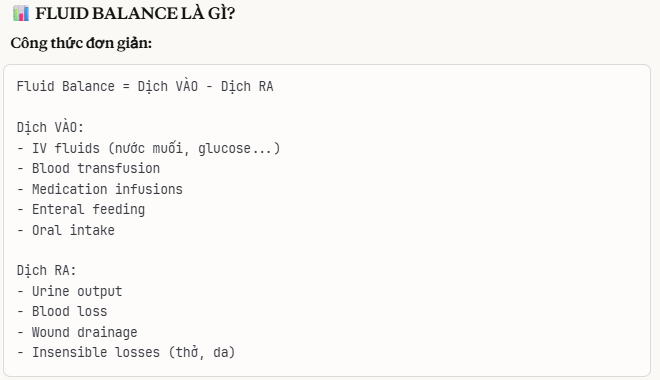

Bệnh nhân A (24h):
Input:  3,200ml (IV fluids) + 800ml (oral) = 4,000ml
Output: 2,100ml (urine) + 200ml (drainage) = 2,300ml
Fluid Balance = 4,000 - 2,300 = +1,700ml

➡️ Bệnh nhân đang "dư" 1.7L dịch!

### **Báo cáo:** **Tỷ Lệ Sử Dụng Tài Nguyên (Resource Utilization Rate)** của các phòng ICU

- **Ngữ Cảnh**: Máy thở, giường ICU, hoặc thuốc (như Noradrenaline) cần được dùng hiệu quả. Dư thừa hoặc thiếu hụt ảnh hưởng chăm sóc.
- **Dữ Liệu Khai Thác**: procedureevents (thủ thuật), inputevents (thuốc), icustays (khoa), d_items (mô tả).

  - Cách Tính: (Số lần sử dụng / Tổng số ca) * 100.
  - Ví Dụ: MICU dùng 40% máy thở, cao hơn SICU 20%, cần cân bằng.
- **Tầm Quan Trọng**: Ban giám đốc cần phân bổ tài nguyên, tránh lãng phí 10% ngân sách.

**Báo cáo:** **Đặc điểm chung của những ca tử vong**.

- Lấy toàn bộ dữ liệu liên quan đến các ca tử vong để phân tích, đào sâu nghiên cứu để đưa ra các thông kê quan trọng về các nguyên nhân/yếu tố ảnh hưởng đến nguy cơ tử vong
  - Độ tuổi
  - BMI dưới hoặc trên mức bình thường
  - Bệnh nền (Danh sách các bệnh lý từng mắc phải, đặc biệt những bệnh như tiểu đường, suy thận, ung thư, cao huyết áp...)
  - Tình hình hiện tại (suy tim, suy thận, suy hấp, và các tổn thương khác như: tổn thương não, tổn thương động mạch...)
  - Các chỉ số xét nghiệm sinh lý
  - Tốc độ được chuyển từ ED sang ICU
  - Tốc độ phản ứng khi lab test bất thường

  => Đưa ra các phương án đào tạo đội ngũ y bác sỹ, điều dưỡng chuyên sâu để có kiến thức chuyên môn tốt, có khả năng phản ứng nhanh để gia tăng tỷ lệ sống sót cho bệnh nhân

## Chưa làm



- Thời lượng trung bình cho các thủ thuật quan trọng (ventilation hours, dialysis sessions).

2. **Kháng sinh & vi sinh**

- **Mô tả**: Join microbiologyevents (kết quả cấy vi khuẩn) + prescriptions (kháng sinh kê đơn) + icustays. Đo tỷ lệ “kê kháng sinh có phù hợp” (antibiotic susceptibility vs prescription).

- **Insight giá trị**: Phát hiện tình trạng kê kháng sinh không nhạy cảm với vi khuẩn → cung cấp dữ liệu cho chương trình kiểm soát kháng sinh (ASP).

3. **Cân bằng dịch (Fluid Balance) & kết cục**

- **Mô tả**: Tính tổng dịch vào (inputevents) – tổng dịch ra (outputevents) cho mỗi ICU stay. Join với icustays + admissions để xem liên quan với tử vong.

- **Insight giá trị**: Xác định nhóm bệnh nhân ICU có nguy cơ dư dịch cao → cảnh báo thực hành truyền dịch.

4. **Readmission toàn viện & ICU**

- **Mô tả**: Join admissions + icustays theo subject_id. Tính tỷ lệ tái nhập viện trong vòng cùng hospitalization hoặc nhập ICU lại trong cùng admission.

- **Insight giá trị**: Highlight khoa nào có tỷ lệ tái nhập cao (trong 30 ngày)→ chỉ ra chỗ cần cải thiện điều dưỡng, chăm sóc sau xuất viện.

5. **Lab bất thường & phản ứng lâm sàng**

- **Ý tưởng**: Trong ICU, khi có xét nghiệm critical (ví dụ: K+ quá cao, lactate cao → sốc), bác sĩ/nurse cần can thiệp ngay (thuốc, truyền dịch, vận mạch).

- **Cách làm**:

    - Lấy labevents → lọc các giá trị vượt ngưỡng (ví dụ K+ > 6.0 mmol/L, lactate > 4 mmol/L).

    - Join inputevents + prescriptions + chartevents để kiểm tra sau lab đó có hành động gì không (ví dụ truyền insulin + glucose cho K+ cao, truyền dịch khi lactate cao).

- **Insight**: Đo được tốc độ phản ứng lâm sàng với lab bất thường. Nếu nhiều trường hợp không có can thiệp, đây là “red flag” cho BGĐ vì liên quan đến safety & chất lượng chăm sóc.

17. **SOFA/APACHE score trung bình** đối với các ca nhập viện ICU.

    - Đây là thang điểm đánh giá mức độ nặng của bệnh nhân ICU.

      - **SOFA (Sequential Organ Failure Assessment)**: tính dựa trên các chỉ số về hô hấp, đông máu, gan, tim mạch, thần kinh, thận. Điểm càng cao → bệnh nhân càng nguy kịch.

      - **APACHE II (Acute Physiology And Chronic Health Evaluation)**: dựa trên nhiều xét nghiệm sinh lý + tuổi + bệnh nền để dự đoán tử vong.

**Báo Cáo 2: Sử Dụng Thuốc Theo Chẩn Đoán**

- **Mô tả**: ETL dữ liệu từ inputevents (module ICU) và diagnoses_icd (module hospital) để phân tích tỷ lệ sử dụng thuốc (như Noradrenaline, itemid 30045) theo chẩn đoán (ICD-10 codes). Làm sạch itemid (dùng d_items để map), join tables qua subject_id, lưu vào warehouse, rồi tạo báo cáo.
- **Insight Giá Trị**: Phát hiện thuốc phổ biến với bệnh lý (ví dụ: Noradrenaline chiếm 70% ca sốc R57), giúp các khoa tối ưu toa thuốc và giảm chi phí thuốc không cần thiết.

### **4. Báo cáo xét nghiệm (Lab Results Dashboard)**

- **Phân bố giá trị lab tests bất thường (Distribution of abnormal lab test values)**

  - Tức là: Trong số tất cả các xét nghiệm (ví dụ: creatinine, sodium, hemoglobin…), có bao nhiêu % kết quả cao hơn ngưỡng bình thường hoặc thấp hơn ngưỡng bình thường.

    - Ví dụ: 25% bệnh nhân ICU có creatinine > 1.5 (suy thận).

    - Hoặc: 40% kết quả hemoglobin < 10 g/dL (thiếu máu).

🔹 Ý nghĩa: Cho biết mức độ phổ biến của các bất thường trong quần thể bệnh nhân → hỗ trợ ưu tiên điều trị.

- Thông kê tỷ lệ bệnh nhân được đặt nội khí quản, thở máy, lọc máu, central line…
=> Dự trù đầy đủ nhân lực, máy móc để phục vụ bệnh nhân

**Báo cáo:** **Top 100 loại thuốc bị thiếu nhiều nhất (được bác sỹ kê đơn, nhưng hết thuốc, nên khoa dược phải cho thuốc thay thế)**

